In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

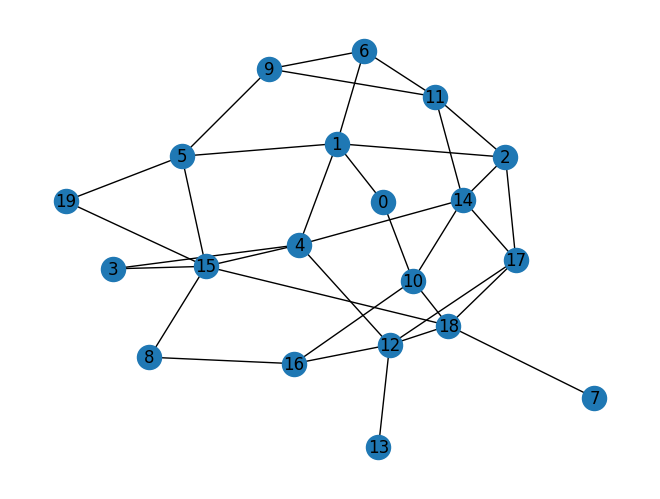

In [26]:
# Generate a random Erdős-Rényi graph with n nodes and probability p
n = 20  # Number of nodes
p = 0.15  # Probability of edge creation

random_graph = nx.erdos_renyi_graph(n, p)
# Plot the graph
nx.draw(random_graph, with_labels=True)
plt.show()

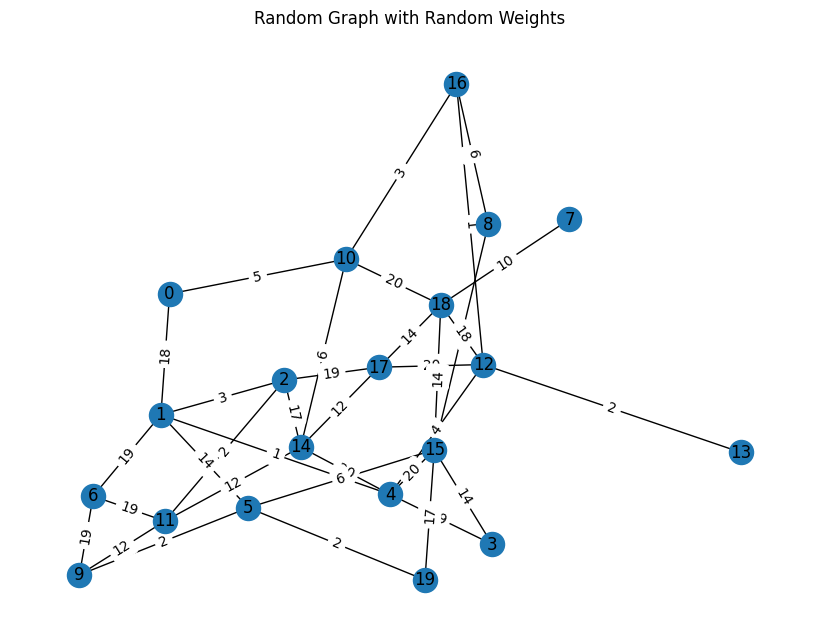

In [27]:
#generate random wieght for nodes
for (u, v) in random_graph.edges():
    random_graph.edges[u, v]['weight'] = random.randint(1, 20)
    
    
#show the graph
pos = nx.spring_layout(random_graph)
edge_labels = nx.get_edge_attributes(random_graph, 'weight')    

plt.figure(figsize=(8, 6))
nx.draw(random_graph, pos, with_labels=True)
nx.draw_networkx_edge_labels(random_graph, pos, edge_labels=edge_labels)
plt.title("Random Graph with Random Weights")
plt.show()

In [42]:
#finding the shortest path with dijkstra algorithm
sorce = 0
dest = 11

start_time = time.time()

shortest_path = nx.dijkstra_path(random_graph, sorce, dest, weight='weight')

end_time = time.time()
executing_time = end_time - start_time
print(f"the shortest_path with dijkstra algorithm is: {shortest_path}, executing time is : {executing_time}")

the shortest_path with dijkstra algorithm is: [0, 10, 16, 12, 4, 1, 2, 11], executing time is : 0.0


In [47]:
#make dataframe from graph
edges = pd.DataFrame(random_graph.edges(data=True), columns=['Source', 'Destination', 'data'])

#create wieght column and drop data column
edges['wieght'] = edges['data'].apply(lambda x:x['weight'])
edges = edges.drop(columns=['data'])

#save Dataframe
with pd.ExcelWriter('graph_data_with_weights.xlsx') as writer:
    edges.to_excel(writer, sheet_name='Edges', index=False)

print(edges.head())

   Source  Destination  wieght
0       0            1      18
1       0           10       5
2       1            2       3
3       1            4       1
4       1            5      14
